<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/Exercises_chapter13_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Correlation Coefficient r



#2. Linear Regression

Regression models are a class of statistical models that allows us to test the hypothesis of whether there is a significant relationship between a response variable and some explanatory variable(s). 

That is, given some explanatory variables, you can make predictions about the value of the response variable. 

The **response variable**, the one we want to make predictions on, is also known as the dependent variable or the variable Y. 

The **explanatory variables** are used to explain how the predictions will change, are also known as independent variables or variable X. 

Linear regression is used **when the response variable is continuous (i.e., numeric).**


A regression is a straight line and the line is defined by two properties: 

**The intercept** is the y value, when x is zero. 

**The slope** is the steepness of the line, equal to the amount y increases if x is increased one unit at a time. 



---



**The equation** for a straight line is that the y value is the intercept plus the slope times the x value.

$$Y = intecept + slope * x$$

Writen with the following formula for a hypothesized line:

$$Y =  \beta_0 + \beta_1x$$ 

$\beta_0$ is a constant

$\beta_1$ is the slope

$x$ is the value of independent variable (the predictor)

$Y$ is the value of the dependent variable (the response variable)



---



**Estimating the intercept**. Where the trend line intercept the y axis.

**Estimating the slope**. Calculate the change in y between two points (we calculate the change in x between two points and devide one by the other.

**1. State the hypothesis**

$H_0: b_1 = 0$

$H_a: b_1 \neq 0$

Where $b_1$ is the slope of the regression line




**2. Checking conditions for inference**



*   The dependent variable $Y$ has a linear relationship to the independent variable $X$.
*   Any given x, y is independent
*   y values are approx. normally distributed
*   Check for homoscendasticity: For each value of x, the probability distribution of Y has the same variance ($\sigma$)
*   Check for multicollinearity: predictor variables are independent of each other 
*   Check for autocorrelation: error terms are independent (uncorrelated)










**3. State the significance level**

**4. Calculate the t-test statistic**

We first need to calculate the standard error of the slope.


$s_{e}^2 =\frac {\sum{(y_i -\bar{y_i})}^2} {n-k}$

$\bar{y_i}$ is the predicted value

$y_i$ is the observed value

${n-k}$ is the degrees of freedom

**Example:** 

 **Need to do more work here...**


 $t_c =\frac {{b_1 -\beta_1}^2} {S_b1}$

 $s_b1$ = standard deviation of the estimate of $b_1$

 The formula for $S_{b1}$:

 $S_{b1} = \frac {{S_e}^2} {\sqrt{(x_i-\bar{x})^2}}$

 Degrees of freedom:

 $df = n-k -1$  
 
Where $k$ is the number of independent variables and the extra $1$ is subtracted because of the intercept.






**5. **



**Tasks of the day:**

1.   We'll visualize and fit linear regressions
2.   We'll make predictions with them
3. We'll determine whether the model is a good fit


---







In [ ]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
%matplotlib inline

### Artificial example (short story)

In [ ]:
# generating data
rng = np.random.RandomState(1)
predictor_variable = 10 * rng.rand(50)
response_variable = 2 * predictor_variable - 5 + rng.randn(50)

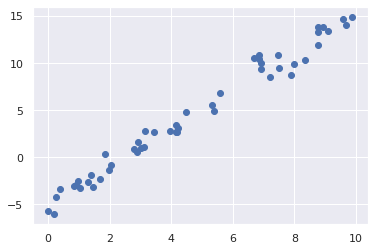

In [ ]:
# visualising data
plt.scatter(predictor_variable, response_variable)

In [ ]:
x = response_variable
y = predictor_variable

model=sm.OLS(y, x)

mf=model.fit()

#ms.summary()
print(mf.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              969.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                    2.75e-11
Time:                        08:57:20   Log-Likelihood:                         -37.009
No. Observations:                  11   AIC:                                      76.02
Df Residuals:                      10   BIC:                                      76.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### The end of short story

## Bivariate OLS

Example 13.5

A random sample of 11 statistics students produced the following data, where x is the third exam score out of 80, and y is the final exam score out of 200. Can you predict the final exam score of a randomly selected student if you know the third exam score?

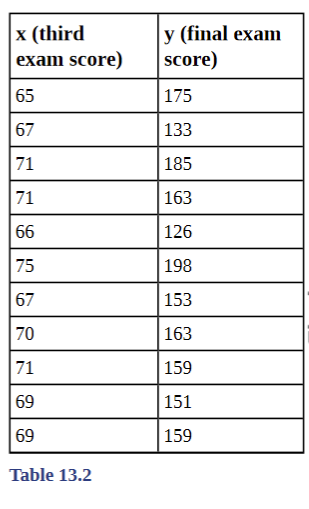



### 1a. Visualizing linear regressions

[Matplotlib cheatsheets and handouts](https://matplotlib.org/cheatsheets/)

In [ ]:
# setting the data
predictor_variable = [65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69]
response_variable = [175, 133, 185, 163, 126, 198, 153, 163, 159, 151, 159]

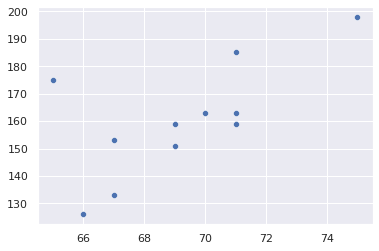

In [ ]:
#visualizing regressions

# Draw the scatter plot
sns.scatterplot(x = predictor_variable, y=response_variable)

# Show the plot
plt.show()

In seaborn,  the **regplot() function** adds a trend line calculated using linear regression. Also, by default, regplot() adds a confidence interval around the line, this can be helpful, but can also removed by setting the $ci$ argument to "None", in case, like now, when we're mostly interested in the reg line. 

For seaborn plotting consult their original [tutorial](http://seaborn.pydata.org/tutorial.html). Or sns [cheat-sheet in pdf](http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247) by datacamp.

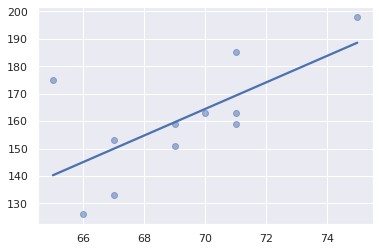

In [ ]:
# Draw a trend line on the scatter plot 
sns.regplot(x=predictor_variable,
            y=response_variable,
            ci=None,
            scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

### 1b. Fitting linear regressions:

Different packages are used to run regression models. [Statsmodels](https://www.statsmodels.org/dev/regression.html) is a popular choice.

**The function**

The Statsmodels function ols() takes two arguments. 



*   The first argument is a formula: the response variable is written to the left of the tilde, and the explanatory variable is written to the right. 
*   The data argument takes the DataFrame containing the variables.
*   To actually fit the model, we add .fit()  to the created model object. 
*   Print the resulting model, using the params attribute.


This will result in two coefficients. 

These coefficients are the intercept and slope of the straight line. 

How do we interpret these?

For every additional x-value, we expect the total y to increase by what factor.


In [ ]:
#Running a regression with continuous predictor
x = predictor_variable
y = response_variable

#x = sm.add_constant(x)

model = sm.OLS(x,y)

#Fitting a regression
results = model.fit()

# Print the parameters of the fitted model
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              969.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                    2.75e-11
Time:                        09:04:57   Log-Likelihood:                         -37.009
No. Observations:                  11   AIC:                                      76.02
Df Residuals:                      10   BIC:                                      76.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


**2. Making predictions**



We call ols with (1) a formula and (2) the dataset, after which we add .fit(). 

The response variable goes on the left-hand side of the formula, and the explanatory variable goes on the right. 

We need to assign the result to a variable, so we can reuse it later on. 

To view the coefficients of the model, we can use the params attribute in a print call (like above).



In [ ]:
reg_model = ols("response ~ predict", data = dataframe).fit()
print(reg_model.params)

The next step is to choose some values for the explanatory variables. To create new explanatory data, we store our explanatory variables in a new pandas DataFrame. The goal is to create a DataFrame that contains both the explanatory variable and the predicted response. 

Now this can allow us to answer questions that go beyond what the original dataset allows us to do (= make predictions). 



*   We specify an interval of values using the np.arange function, taking the start and end of the interval as arguments. Note that the end of the interval, does not include this value.
*   Then, call predict() on the model, passing the dataframe with the explanatory variables as the argument.
*   The predict function returns a series of predictions, one for each row of the explanatory data.










In [ ]:
#Example:

import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'predictor': np.arange(0, 11)}) #values 1-10

# Use "model" to predict with explanatory_data, call it response_var
response_var = model.predict(explanatory_data)

#we start with the existing column, explanatory_data. 
#Then, we use the pandas .assign() to add a new column, named after the response variable, response. 

# Create prediction_data
prediction_data = explanatory_data.assign(response_var = response_var)

# Print the result
print(prediction_data)

Working with model objects, what are they?

**.fittedvalues attribute** - "Fitted vallues" are predictions on the original dataset used to create the model.

**.resid attribute** - are a measure of inaccuracy in the model fit. Like fitted values, there is one residual for each row of the dataset. Each residual is the actual response value minus the predicted response value.

**.summary()**

In [ ]:
print(model.params)
print(model.fittedvalues) #equal to print(model.predict(explanatory_data))
print(model.resid) 
model.summary()

In [ ]:
# Get the coefficients of mdl_price_vs_conv
coeffs = model.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
reg = intercept + slope * explanatory_data
print(reg)

# Compare to the results from .predict()
print(reg.assign(predictions_auto=reg_model.predict(explanatory_data)))

**3. Assessing model fit**

How good is our model?

The **coefficient of determination**, also called r-squared. Either written with a lower case r for simple linear regression and an upper case R when there are several explanatory variables. 

$ r^2$ is defined as the proportion of the variance in the response variable that is predictable from the explanatory variable. 

A score of $1$ means the model has a perfect fit, and a score of $0$ means the model is no better than randomness. 

For simple linear regression, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared. ( .rsquared attribute in python)

What is a good $ r^2$? It depends on what your studying.

In [ ]:
#correlation squared
coeff_determination = variable["x"].corr(variable["y"]) ** 2
print(coeff_determination)

In [ ]:
reg_model = ols("y ~ x", data = dataframe).fit()
print(reg_model.summary())
print(reg_model.rsquared)

Another way to assess model fit is through **the residual standard error, or RSE**. RSE tells us how much predictions are typically wrong.

Specifically, each residual is the difference between a predicted value and an observed value. 

The **mean squared error, or MSE**, is the squared residual standard error. We can calculate the RSE by taking the square root of MSE. 

$MSE = RSE^2$

In [ ]:
mse = reg_model.mse_resid
print('mse:', mse)

#Calculating rse
rse = np.sqrt(mse)
print("rse:", rse)

**Calculating RSE**
**need to do a math example...**

(1) Square each residual, take the sum of them.

(2) calculate the degrees of freedom of the residuals. The number of observations - the nunber of model coefficients

(3) take the square root of the ratio of these numbers. 



In [ ]:
#Calculating RSE

residuals_sq = reg_model.resid ** 2
residual_sum_of_sq = sum(residuals_sq)
deg_freedom = len(dataset.index) - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)

print("resid sum of sq: ", resid_sum_of_sq)
print("deg freedom: ", deg_freedom)
print("rse:", rse)

Root-mean-square error (RMSE) performs the same task as residual standard error, namely quantifying how inaccurate the model predictions are. 

In [ ]:
#Calculating RMSE
# Important: RMSE does not account for the number of coefficients, worse for comparisions of models

residuals_sq = reg_model.resid ** 2
residual_sum_of_sq = sum(residuals_sq)
n_obs = len(dataset.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)

print("rmse:", rmse)